In [1]:
# import os

# # Absolute path of a file
# old_name = r"C://Users//nvbma//Task/Untitled7.ipynb"
# new_name = r"C:\\Users\\nvbma\\Task/online_retail_project.ipynb"

# # Renaming the file
# os.rename(old_name, new_name)

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [3]:
df = pd.read_excel("Online Retail.xlsx")

In [4]:
df.columns
# or
# df.keys()

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [5]:
df.shape

(541909, 8)

In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


- By using the df.describe() function we came to know that our minimum quantity is in negative and we all know that a quantity will never be in Negative. So, we have to remove this redundancy in order to get better accuracy because redundancy can cause miss grouping of data.



# from here onwards pre-processing of data will start

In [7]:
df=df.loc[df["Quantity"] >0] 

In [8]:
df.shape

(531285, 8)

In [9]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,531285.000000,531285.000000,397924.000000
mean,10.655262,3.857296,15294.315171
std,156.830323,41.810047,1713.169877
min,1.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


In [10]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531285 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    531285 non-null  object        
 1   StockCode    531285 non-null  object        
 2   Description  530693 non-null  object        
 3   Quantity     531285 non-null  int64         
 4   InvoiceDate  531285 non-null  datetime64[ns]
 5   UnitPrice    531285 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      531285 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.5+ MB


# from here we now calculate our Monetary Value

In [12]:
#calculating our monetary value

df["Sale"] =df.Quantity * df.UnitPrice 
#created a column of sale

In [13]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sale
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [14]:
monetary =df.groupby("CustomerID").Sale.sum()
"""
Here we are getting our monetary value by grouping customer with their customer id and total no. of sales.
"""

'\nHere we are getting our monetary value by grouping customer with their customer id and total no. of sales.\n'

In [15]:
monetary.sort_values(ascending=False).head()

CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
14911.0    143825.06
Name: Sale, dtype: float64

In [16]:
monetary

CustomerID
12346.0    77183.60
12347.0     4310.00
12348.0     1797.24
12349.0     1757.55
12350.0      334.40
             ...   
18280.0      180.60
18281.0       80.82
18282.0      178.05
18283.0     2094.88
18287.0     1837.28
Name: Sale, Length: 4339, dtype: float64

In [17]:
monetary = monetary.reset_index() 
#resetting our index,our monetary has multiindex so we are removing it


In [18]:
monetary

,CustomerID,Sale
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4334,18280.0,180.60
4335,18281.0,80.82
4336,18282.0,178.05
4337,18283.0,2094.88


# Now we will calculate frequency of our dataset



In [19]:
# calculating our frequency

frequency=df.groupby("CustomerID").InvoiceNo.count()

# """
# for calculating frequency here we also using groupby function grouping CustomerId along with the count of Their invoice no. we can get our frequency
# """


In [20]:
frequency.sort_values(ascending=False)

CustomerID
17841.0    7847
14911.0    5677
14096.0    5111
12748.0    4596
14606.0    2700
           ... 
15940.0       1
15823.0       1
15802.0       1
15753.0       1
12346.0       1
Name: InvoiceNo, Length: 4339, dtype: int64

In [21]:
frequency = frequency.reset_index()
#resetting our index,our frequency has multiindex so we are removing it

# frequency


In [22]:
frequency.head()

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


# Now we will calculate our recency value

In [23]:
LastDate=max(df.InvoiceDate)

In [24]:
LastDate

Timestamp('2011-12-09 12:50:00')

In [25]:
LastDate = LastDate + pd.DateOffset(days=1)
#adding one to LastDate


In [26]:
LastDate

Timestamp('2011-12-10 12:50:00')

In [27]:
df["Diff"] = LastDate - df.InvoiceDate

#Diff is the difference between our Lastate and InvoiceData



In [28]:
recency = df.groupby("CustomerID").Diff.min()

In [29]:
recency.reset_index()

,CustomerID,Diff
0,12346.0,326 days 02:49:00
1,12347.0,2 days 20:58:00
2,12348.0,75 days 23:37:00
3,12349.0,19 days 02:59:00
4,12350.0,310 days 20:49:00
...,...,...
4334,18280.0,278 days 02:58:00
4335,18281.0,181 days 01:57:00
4336,18282.0,8 days 01:07:00
4337,18283.0,4 days 00:48:00


In [30]:
recency.head()

CustomerID
12346.0   326 days 02:49:00
12347.0     2 days 20:58:00
12348.0    75 days 23:37:00
12349.0    19 days 02:59:00
12350.0   310 days 20:49:00
Name: Diff, dtype: timedelta64[ns]

# Now we create a combined data frame

In [31]:
#comnining all dataframes into one


rmf = monetary.merge(frequency, on = "CustomerID")


In [32]:
rmf = rmf.merge(recency, on = "CustomerID")

In [33]:
rmf

,CustomerID,Sale,InvoiceNo,Diff
0,12346.0,77183.60,1,326 days 02:49:00
1,12347.0,4310.00,182,2 days 20:58:00
2,12348.0,1797.24,31,75 days 23:37:00
3,12349.0,1757.55,73,19 days 02:59:00
4,12350.0,334.40,17,310 days 20:49:00
...,...,...,...,...
4334,18280.0,180.60,10,278 days 02:58:00
4335,18281.0,80.82,7,181 days 01:57:00
4336,18282.0,178.05,12,8 days 01:07:00
4337,18283.0,2094.88,756,4 days 00:48:00


In [34]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sale,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,374 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,374 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,374 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,374 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,374 days 04:24:00


In [35]:
rmf.columns = ["CustomerID", "Monetary", "Frequency", "Recency"]


In [36]:
rmf

,CustomerID,Monetary,Frequency,Recency
0,12346.0,77183.60,1,326 days 02:49:00
1,12347.0,4310.00,182,2 days 20:58:00
2,12348.0,1797.24,31,75 days 23:37:00
3,12349.0,1757.55,73,19 days 02:59:00
4,12350.0,334.40,17,310 days 20:49:00
...,...,...,...,...
4334,18280.0,180.60,10,278 days 02:58:00
4335,18281.0,80.82,7,181 days 01:57:00
4336,18282.0,178.05,12,8 days 01:07:00
4337,18283.0,2094.88,756,4 days 00:48:00


In [37]:
RMF1 = rmf.drop("CustomerID",axis =1) 

#dropping customer id and storing it into RMF1


In [38]:
RMF1



,Monetary,Frequency,Recency
0,77183.60,1,326 days 02:49:00
1,4310.00,182,2 days 20:58:00
2,1797.24,31,75 days 23:37:00
3,1757.55,73,19 days 02:59:00
4,334.40,17,310 days 20:49:00
...,...,...,...
4334,180.60,10,278 days 02:58:00
4335,80.82,7,181 days 01:57:00
4336,178.05,12,8 days 01:07:00
4337,2094.88,756,4 days 00:48:00


- RMF1.Recency: This refers to the Recency column in the RMF1 DataFrame.
- .dt: This is the accessor used to access the datetime properties of a Series or DataFrame column.
- .days: This attribute is used to extract the number of days from a datetime column. It returns the number of days as an integer.

In [39]:
RMF1.Recency = RMF1.Recency.dt.days

In [40]:
RMF1

,Monetary,Frequency,Recency
0,77183.60,1,326
1,4310.00,182,2
2,1797.24,31,75
3,1757.55,73,19
4,334.40,17,310
...,...,...,...
4334,180.60,10,278
4335,80.82,7,181
4336,178.05,12,8
4337,2094.88,756,4


Our Data pre-processing part ends here now we will perform the analysis of or data.

we will perform analysis of data using KMeans algorithm.

In [41]:
# RMF1 = pd.DataFrame(RMF1 , columns=[ "Monetry", "Frequence", "Recency"])

In [42]:
RMF1

,Monetary,Frequency,Recency
0,77183.60,1,326
1,4310.00,182,2
2,1797.24,31,75
3,1757.55,73,19
4,334.40,17,310
...,...,...,...
4334,180.60,10,278
4335,80.82,7,181
4336,178.05,12,8
4337,2094.88,756,4


In [43]:
from sklearn.cluster import KMeans

In [44]:
ssd = []
for k in range(1,20):
    km = KMeans(n_clusters=k)
    km.fit(RMF1)
    ssd.append(km.inertia_)



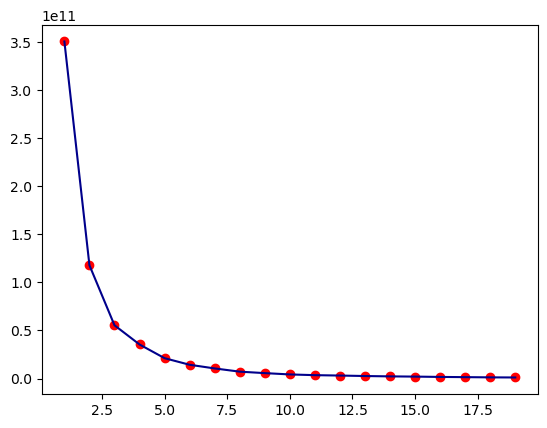

In [45]:
plt.plot(np.arange(1,20), ssd,color="darkblue")
plt.scatter(np.arange(1,20), ssd,color="red")
plt.show()

- In the KMean algo we are using elbow method to find the no. of clustering groups.

- W will perform clustering now onwards

In [46]:
model = KMeans(n_clusters=5)


ClusterID = model.fit_predict(RMF1)

In [47]:
ClusterID.shape

(4339,)

In [48]:
ClusterID

array([2, 0, 0, ..., 0, 0, 0])

In [49]:
RMF1["ClusterID"] = ClusterID

In [50]:
RMF1


,Monetary,Frequency,Recency,ClusterID
0,77183.60,1,326,2
1,4310.00,182,2,0
2,1797.24,31,75,0
3,1757.55,73,19,0
4,334.40,17,310,0
...,...,...,...,...
4334,180.60,10,278,0
4335,80.82,7,181,0
4336,178.05,12,8,0
4337,2094.88,756,4,0


In [51]:
km_cluster_sale =RMF1.groupby("ClusterID").Monetary.mean()

km_cluster_Recency =RMF1.groupby("ClusterID").Recency.mean()

km_cluster_Frequence =RMF1.groupby("ClusterID").Frequency.mean()

print(km_cluster_sale)
print(km_cluster_Recency)
print(km_cluster_Frequence)

ClusterID
0      1049.274575
1    269931.660000
2     51858.727500
3    149828.502000
4     10022.790242
Name: Monetary, dtype: float64
ClusterID
0    96.622043
1     1.500000
2    37.250000
3     8.800000
4    20.526570
Name: Recency, dtype: float64
ClusterID
0      69.695440
1    1255.500000
2    1173.375000
3    1626.600000
4     354.096618
Name: Frequency, dtype: float64


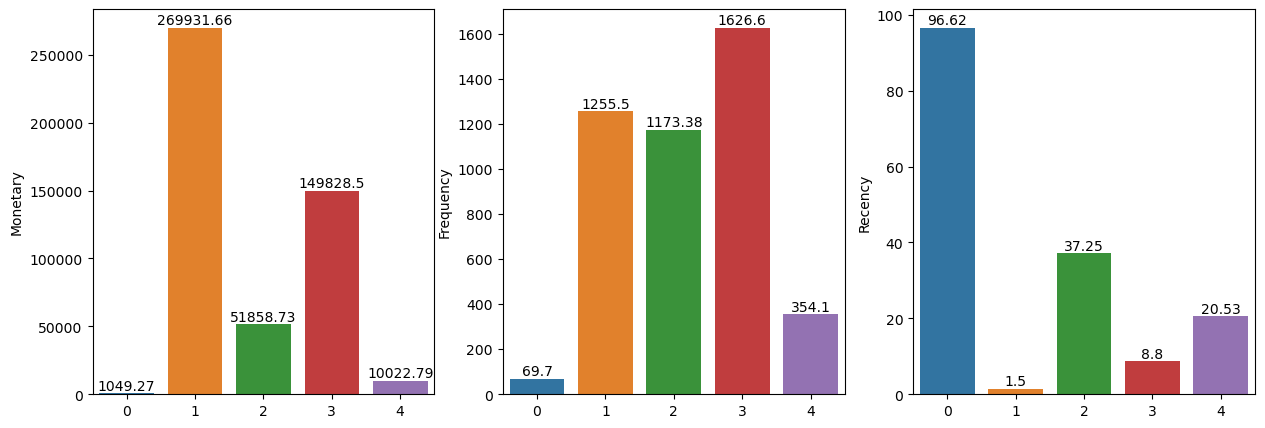

In [54]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.barplot(x=[0, 1, 2, 3, 4], y=km_cluster_sale, ax=axs[0])
for i, v in enumerate(km_cluster_sale):
    axs[0].text(i, v, str(round(v, 2)), ha='center', va='bottom')

sns.barplot(x=[0, 1, 2, 3, 4], y=km_cluster_Frequence, ax=axs[1])
for i, v in enumerate(km_cluster_Frequence):
    axs[1].text(i, v, str(round(v, 2)), ha='center', va='bottom')

sns.barplot(x=[0, 1, 2, 3, 4], y=km_cluster_Recency, ax=axs[2])
for i, v in enumerate(km_cluster_Recency):
    axs[2].text(i, v, str(round(v, 2)), ha='center', va='bottom')

plt.show()


# Monetary vs Cluster

- As we see in Monetary vs Cluster groups group 3 has highest value at an average of sale 269931.66  of total approximately 55.92% of total it means company is getting more profit from Group 3 customers


#  Frequency vs Cluster

- As we see in As we see in Frequency vs Cluster group 1 has highest value at an average of frequecies 1626.66 of total approximately 36.3 % of total it means 
 group 1 customers are more loyal to Company compare to others

# Recency vs Cluster

- As we see in As we see in Recency vs Cluster group 2 has highest value at an average of Recency 96.26 of total approximately 58.66 % of total it means group 2 customers are 
 visiting the company.
- It Looks like group are just visiting the company and not buying anything from company that's why it even though group 2 recency 
 is more company is getting a profit from that group of customers
- It seem like group 2 are not a good buyer because of financial problem or maybe they are financially good

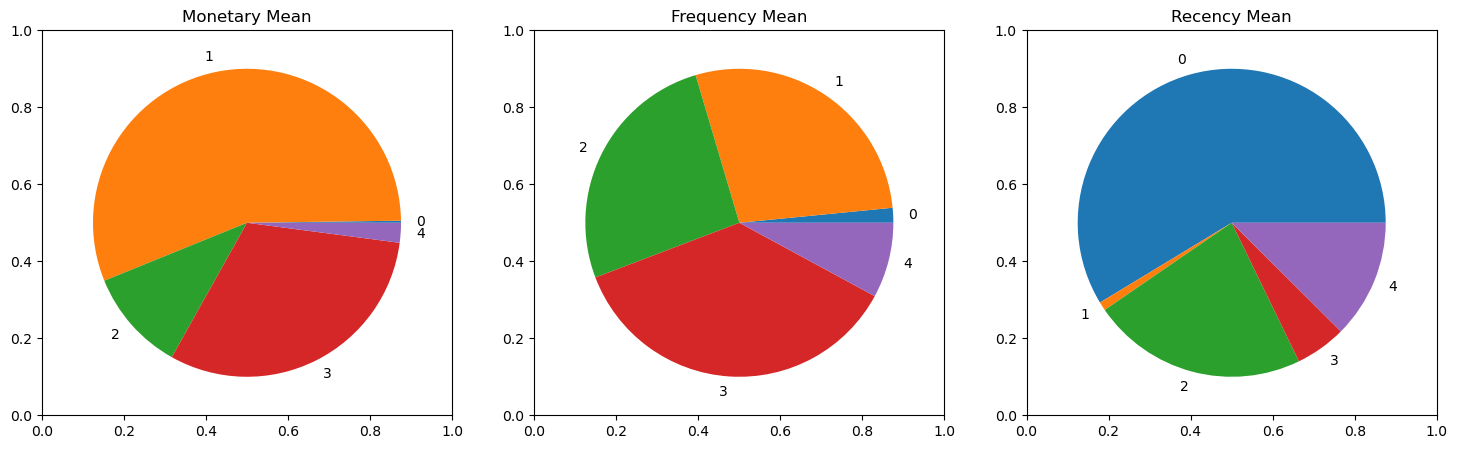

In [55]:
fig,axis = plt.subplots(1,3, figsize =(18,5))

ax1 =fig.add_subplot(1,3,1)

plt.title("Monetary Mean")

ax1.pie(km_cluster_sale, labels =[0,1,2,3,4])

ax1 =fig.add_subplot(1,3,2)

plt.title("Frequency Mean")

ax1.pie(km_cluster_Frequence, labels =[0,1,2,3,4])

ax1 =fig.add_subplot(1,3,3)

plt.title("Recency Mean")

ax1.pie(km_cluster_Recency, labels =[0,1,2,3,4])

#ax1.axis("off")
plt.show()

- Group 1 is the group of customer who spends maximum amount of money and also has a good frequency and low recency rate.
- Group 4 are the customers whose frequency rate is maximum and monetary value is also good and recency rate is also quite good, 
- whereas Group 0 is the group of customers who has a very high recency rate means they have not purchased anything from the past.

In [56]:
import pandas as pd

# Assuming you have a DataFrame called df with "Country" and "InvoiceNo" columns
df['CanceledOrder'] = df['InvoiceNo'].astype(str).apply(lambda x: x.startswith('C'))

# Group by country and count the canceled orders
cancel_order_counts = df[df['CanceledOrder']].groupby('Country').size().reset_index(name='CancelOrderCount')

# Display the result
print(cancel_order_counts)

Empty DataFrame
Columns: [Country, CancelOrderCount]
Index: []


In [59]:
RMF1['Monetary'].max()

280206.02

In [64]:
rmf

,CustomerID,Monetary,Frequency,Recency
0,12346.0,77183.60,1,326 days 02:49:00
1,12347.0,4310.00,182,2 days 20:58:00
2,12348.0,1797.24,31,75 days 23:37:00
3,12349.0,1757.55,73,19 days 02:59:00
4,12350.0,334.40,17,310 days 20:49:00
...,...,...,...,...
4334,18280.0,180.60,10,278 days 02:58:00
4335,18281.0,80.82,7,181 days 01:57:00
4336,18282.0,178.05,12,8 days 01:07:00
4337,18283.0,2094.88,756,4 days 00:48:00


In [66]:
customer_id_max_monetary = rmf.loc[rmf['Monetary'].idxmax(), 'CustomerID']


In [67]:
customer_id_max_monetary

14646.0

In [74]:
customer_id = 14646.0  # Replace 'your_customer_id' with the actual customer ID you want to search for
row = rmf.loc[rmf['CustomerID'] == customer_id]


In [75]:
row

,CustomerID,Monetary,Frequency,Recency
1690,14646.0,280206.02,2080,2 days 00:38:00


In [77]:
customer_id = 14646.0  # Replace 'your_customer_id' with the actual customer ID you want to search for
row1 = df.loc[df['CustomerID'] == customer_id]


In [78]:
row1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sale,Diff,CanceledOrder
37952,539491,21981,PACK OF 12 WOODLAND TISSUES,12,2010-12-20 10:09:00,0.29,14646.0,Netherlands,3.48,355 days 02:41:00,False
37953,539491,21986,PACK OF 12 PINK POLKADOT TISSUES,12,2010-12-20 10:09:00,0.29,14646.0,Netherlands,3.48,355 days 02:41:00,False
37954,539491,22720,SET OF 3 CAKE TINS PANTRY DESIGN,2,2010-12-20 10:09:00,4.95,14646.0,Netherlands,9.90,355 days 02:41:00,False
37955,539491,21931,JUMBO STORAGE BAG SUKI,1,2010-12-20 10:09:00,1.95,14646.0,Netherlands,1.95,355 days 02:41:00,False
37956,539491,22613,PACK OF 20 SPACEBOY NAPKINS,2,2010-12-20 10:09:00,0.85,14646.0,Netherlands,1.70,355 days 02:41:00,False
...,...,...,...,...,...,...,...,...,...,...,...
534958,581176,22908,PACK OF 20 NAPKINS RED APPLES,96,2011-12-07 15:19:00,0.72,14646.0,Netherlands,69.12,2 days 21:31:00,False
534959,581176,22907,PACK OF 20 NAPKINS PANTRY DESIGN,96,2011-12-07 15:19:00,0.72,14646.0,Netherlands,69.12,2 days 21:31:00,False
534960,581176,22029,SPACEBOY BIRTHDAY CARD,72,2011-12-07 15:19:00,0.36,14646.0,Netherlands,25.92,2 days 21:31:00,False
534961,581176,22712,CARD DOLLY GIRL,72,2011-12-07 15:19:00,0.36,14646.0,Netherlands,25.92,2 days 21:31:00,False


In [84]:
customer_id = 14646.0  # Replace 'your_customer_id' with the actual customer ID you want to calculate the sum for
total_sale = df[df['CustomerID'] == customer_id]['Sale'].sum()


In [85]:
total_sale

280206.02

In [87]:
customer_id_max_frequency = rmf.loc[rmf['Frequency'].idxmax(), 'CustomerID']


In [88]:
customer_id_max_frequency

17841.0

In [110]:
customer_id = 17841.0  # Replace 'your_customer_id' with the actual customer ID you want to search for
row1 = df.loc[df['CustomerID'] == customer_id]
row1.shape

(7847, 11)

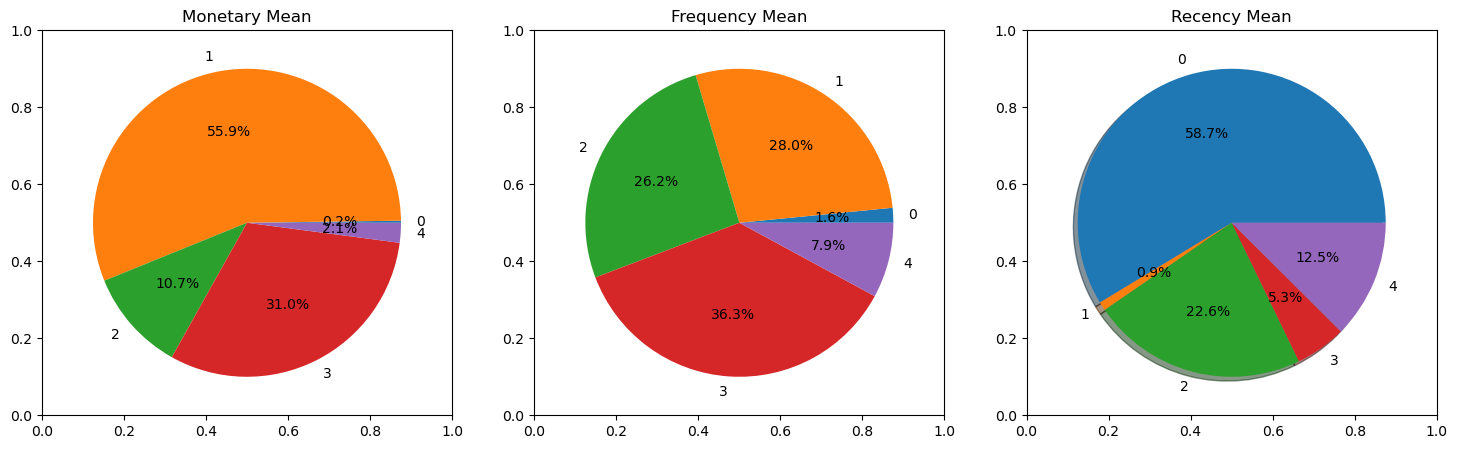

In [109]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Pie chart for Monetary Mean
ax1 = fig.add_subplot(1, 3, 1)
plt.title("Monetary Mean")
wedges, _, autopcts = ax1.pie(km_cluster_sale, labels=[0, 1, 2, 3, 4], autopct='%1.1f%%')
# ax1.legend(wedges, [f"{l} - {s}" for l, s in zip([0, 1, 2, 3, 4], autopcts)])
# ax1.axis('equal')

# Pie chart for Frequency Mean
ax2 = fig.add_subplot(1, 3, 2)
plt.title("Frequency Mean")
wedges, _, autopcts = ax2.pie(km_cluster_Frequence, labels=[0, 1, 2, 3, 4], autopct='%1.1f%%')
# ax2.legend(wedges, [f"{l} - {s}" for l, s in zip([0, 1, 2, 3, 4], autopcts)])
# ax2.axis('equal')

# Pie chart for Recency Mean
ax3 = fig.add_subplot(1, 3, 3)
plt.title("Recency Mean")
wedges, _, autopcts = ax3.pie(km_cluster_Recency, labels=[0, 1, 2, 3, 4], autopct='%1.1f%%',shadow = True)
# ax3.legend(wedges, [f"{l} - {s}" for l, s in zip([0, 1, 2, 3, 4], autopcts)])
# ax3.axis('equal')
plt.axis("off")
plt.show()


In [114]:
df[df['Cus'].isna() == True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sale,Diff,CanceledOrder
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom,0.0,374 days 00:58:00,False
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom,0.0,373 days 22:18:00,False
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,0.0,373 days 22:17:00,False
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,0.0,373 days 22:17:00,False
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,0.0,373 days 22:16:00,False
...,...,...,...,...,...,...,...,...,...,...,...
533712,581103,22689,NaN,4,2011-12-07 11:58:00,0.0,NaN,United Kingdom,0.0,3 days 00:52:00,False
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom,0.0,2 days 18:19:00,False
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom,0.0,2 days 18:15:00,False
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom,0.0,2 days 02:17:00,False


In [131]:
df[df['Description'].isna() == True].count()

InvoiceNo        592
StockCode        592
Description        0
Quantity         592
InvoiceDate      592
UnitPrice        592
CustomerID         0
Country          592
Sale             592
Diff             592
CanceledOrder    592
dtype: int64

In [132]:
df.isna().sum()

InvoiceNo             0
StockCode             0
Description         592
Quantity              0
InvoiceDate           0
UnitPrice             0
CustomerID       133361
Country               0
Sale                  0
Diff                  0
CanceledOrder         0
dtype: int64

In [134]:
rmf.isna().sum()

CustomerID    0
Monetary      0
Frequency     0
Recency       0
dtype: int64

In [135]:
import pandas as pd

# Assuming your DataFrame is named 'df'
df['CustomerID'] = df['CustomerID'].fillna('Unknown')
